In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
train_df = pd.read_csv("train.csv",low_memory=False)
test_df = pd.read_csv("test.csv")

In [3]:
from pandas_profiling import ProfileReport
import pandas as pd
profile=ProfileReport(train_df)
profile.to_file(output_file="train.html")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15996\1768415552.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [5]:
train_df.shape , test_df.shape

((100000, 28), (50000, 27))

In [6]:
train_df.drop(['ID','Customer_ID','Month','Name','SSN',
               'Type_of_Loan','Credit_History_Age']
               ,axis=1,inplace=True)

In [7]:
train_df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,3,7,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,5,4,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

<Axes: >

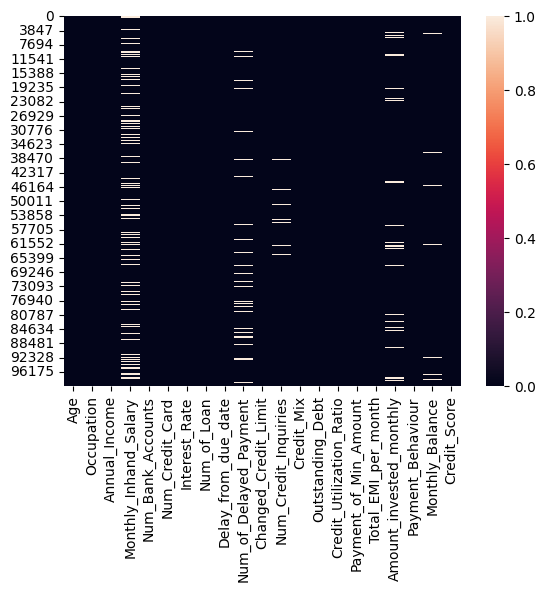

In [9]:
sns.heatmap(train_df.isnull())

In [10]:
train_df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [11]:
train_df.duplicated().sum()

0

In [12]:
size_before_cleaning = test_df.shape
test_df = test_df[test_df.isnull().sum(axis=1) < 3]
print("{} Records dropped".format(size_before_cleaning[0] - test_df.shape[0]))

772 Records dropped


In [13]:
def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)

In [14]:
def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif '_' in str(value):
        return str(value).replace("_", "")
    elif str(value) == '_':
        return str(value)
    else:
        return str(value)

In [15]:
def Amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)

In [16]:
train_df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,3,7,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,5,4,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [17]:
train_df["Amount_invested_monthly"]=train_df["Amount_invested_monthly"].apply(Amount_invested_monthly)
train_df["Amount_invested_monthly"]=train_df["Amount_invested_monthly"].astype("float")

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

In [19]:
train_df["Changed_Credit_Limit"]=train_df["Changed_Credit_Limit"].apply(lambda x:x.split("-")[-1])
train_df.drop(train_df[train_df["Changed_Credit_Limit"]=="_"].index,inplace=True)
train_df["Changed_Credit_Limit"]=train_df["Changed_Credit_Limit"].astype("float")

In [20]:
train_df.drop(train_df[train_df["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)
for i in ['Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Monthly_Balance']:
    train_df[i] = train_df[i].apply(filter_general)
    train_df[i] = train_df[i].astype(np.float64)
    print(i + " Successfully Cleaned")

Age Successfully Cleaned
Annual_Income Successfully Cleaned
Num_of_Loan Successfully Cleaned
Outstanding_Debt Successfully Cleaned
Monthly_Balance Successfully Cleaned


In [21]:
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].apply(filter_delayed_payments)
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].astype(np.float64)

In [22]:
train_df['Occupation'] = train_df['Occupation'].replace('_______', np.nan)
train_df['Occupation'] = train_df['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [23]:
train_df['Credit_Mix'] = train_df['Credit_Mix'].replace('_', np.nan)
train_df['Credit_Mix'] = train_df['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

In [24]:
train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].replace('NM', np.nan)
train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

In [25]:
train_df['Payment_Behaviour'] = train_df['Payment_Behaviour'].replace('!@9#%8', np.nan)
train_df['Payment_Behaviour'] = train_df['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'])))

In [26]:
for i in ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly']:
    train_df[i].fillna(train_df[i].median(), inplace=True)

In [27]:
train_df['Monthly_Balance'].fillna(train_df['Monthly_Balance'].median(), inplace=True)

In [28]:
train_df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,4.0,Standard,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,3091.260833,3,4,3,4.0,-1,14.0,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,23.0,Scientist,19114.12,3091.260833,3,4,3,4.0,5,4.0,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,14.0,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,23.0,Scientist,19114.12,3091.260833,3,4,3,4.0,8,4.0,...,4.0,Good,809.98,27.262259,No,49.574949,62.430172,Low_spent_Large_value_payments,340.479212,Good


In [29]:
numeric_cols = train_df.select_dtypes(exclude = "object").columns
cat_cols = test_df.select_dtypes(include = "object").columns
numeric_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [30]:
cat_cols

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [31]:
def RobustScaling(df_num, cols):
    scaler = preprocessing.RobustScaler()
    robust_df_temp = scaler.fit_transform(df_num)
    robust_df_temp = pd.DataFrame(robust_df_temp, columns =cols)
    return robust_df_temp

In [32]:
train_df[numeric_cols] = RobustScaling(train_df[numeric_cols], numeric_cols)

In [33]:
train_df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-0.647059,Scientist,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,...,-0.333333,Standard,-0.258117,-0.648868,No,-0.150195,-0.311222,High_spent_Small_value_payments,-0.122904,Good
1,-0.647059,Scientist,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-1.055556,0.000000,...,-0.333333,Good,-0.258117,-0.042096,No,-0.150195,-0.098445,Low_spent_Large_value_payments,-0.264738,Good
3,-0.647059,Scientist,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.666667,0.000000,...,-0.333333,Good,-0.258117,-0.888774,No,-0.150195,-0.530350,Low_spent_Small_value_payments,0.024683,Good
4,-0.647059,Scientist,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-0.555556,-1.111111,...,-0.333333,Good,-0.258117,-0.596790,No,-0.150195,-0.412287,High_spent_Medium_value_payments,0.019542,Good
5,-0.647059,Scientist,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.666667,...,-0.333333,Good,-0.258117,-1.156456,No,-0.150195,0.239076,Low_spent_Large_value_payments,-0.468666,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,Mechanic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Standard,NaN,NaN,No,NaN,NaN,High_spent_Large_value_payments,NaN,Poor
99996,NaN,Mechanic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Standard,NaN,NaN,No,NaN,NaN,High_spent_Medium_value_payments,NaN,Poor
99997,NaN,Mechanic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Good,NaN,NaN,No,NaN,NaN,High_spent_Large_value_payments,NaN,Poor
99998,NaN,Mechanic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Good,NaN,NaN,No,NaN,NaN,Low_spent_Large_value_payments,NaN,Standard


In [34]:
train_df['Credit_Score'].replace({"Poor":0, "Standard":1, "Good":2}, inplace=True)
train_df['Credit_Mix'].replace({"Bad":0, "Standard":1, "Good":2}, inplace=True)
train_df['Payment_of_Min_Amount'].replace({"Yes":1, "No":0}, inplace=True)
train_df = pd.get_dummies(train_df, columns = ['Occupation', 'Payment_Behaviour'])

In [35]:
train_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.196429,...,0,1,0,0,0,0,1,0,0,0
1,-0.647059,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-1.055556,0.000000,0.196429,...,0,1,0,0,0,0,0,1,0,0
3,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.666667,0.000000,0.196429,...,0,1,0,0,0,0,0,0,0,1
4,-0.647059,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-0.555556,-1.111111,-0.013655,...,0,1,0,0,0,1,0,0,0,0
5,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.666667,0.196429,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0


In [36]:
for i in numeric_cols:
    train_df[i].fillna(method='ffill', inplace=True)

In [37]:
X = train_df.drop(['Credit_Score'],axis=1)
y = train_df['Credit_Score']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [41]:
clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(X=X_train, y=y_train);
print(f"KNN : {clf.score(X_test,y_test)}")
y_pred = clf.predict(X_test)

KNN : 0.5732503791747918


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 3558  5294   424]
 [ 2977 13283  1034]
 [  524  3534  1679]]


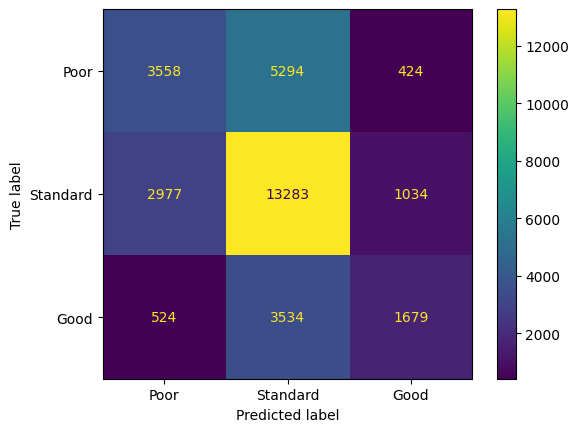

In [43]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])
cm_display.plot()
plt.show()

In [44]:
lr = LogisticRegression(n_jobs=-1,random_state=17)
param = {'C': range(0,11)}
lr.fit(X_train,y_train)
print(f"LogisticRegression : {lr.score(X_test,y_test)}")
y_pred = lr.predict(X_test)

LogisticRegression : 0.5929984213947441


In [45]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 2878  5360  1038]
 [ 1840 13136  2318]
 [   55  2538  3144]]


In [46]:
clf_rf = RandomForestClassifier(n_jobs=-1,random_state=17)
parametrs = {"n_estimators": [5,10,20,30], 'max_depth': range(1, 10)}
clf_rf.fit(X_train,y_train)
print(f"RandomForestClassifier : {clf_rf.score(X_test,y_test)}")
y_pred = clf_rf.predict(X_test)

RandomForestClassifier : 0.6549973689912403


In [47]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 4195  4432   649]
 [ 1973 13747  1574]
 [   76  2442  3219]]


In [48]:
clf3 = DecisionTreeClassifier(max_features=14 ,    max_depth=12)
clf3.fit(X_train,y_train)
print(f"DecisionTreeClassifier : {clf3.score(X_test,y_test)}")
y_pred = clf3.predict(X_test)

DecisionTreeClassifier : 0.5951341814467452


In [49]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 3590  4746   940]
 [ 2489 12622  2183]
 [  191  2531  3015]]


In [50]:
print(f"RandomForestClassifier : {clf_rf.score(X_test,y_test)}")
print(f"DecisionTreeClassifier : {clf3.score(X_test,y_test)}")
print(f"LogisticRegression : {lr.score(X_test,y_test)}")
print(f"KNN : {clf.score(X_test,y_test)}")

RandomForestClassifier : 0.6549973689912403
DecisionTreeClassifier : 0.5951341814467452
LogisticRegression : 0.5929984213947441
KNN : 0.5732503791747918
